# Biodiversity in National Parks

## Introduction:

In this project we will perform some data analysis on the conservation statuses of species in National Parks. We will be looking for any trends/patterns in the species that are in different conservation statuses. We also analyze, clean and plot the given data. The data used for this project was provided by [Codecademy](https://www.codecademy.com).

We want to gain insight to the following:
* Are there any trends/patterns to the types of species that become endangered?
* What is the distribution of categories of species in each park?
* What is the distribution of conservation statuses in each park?
* Which category of species are in each conservation status?

We will begin by first taking a look at the datasets we have been given:

## Importing libraries and loading in data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

obsdf = pd.read_csv("observations.csv")
spedf = pd.read_csv("species_info.csv")

There are 2 datasets here. We will take a look at them one at a time and give a brief summary at the end of each section. We will start with the **observations** (obsdf) dataset and then look at the **species_info** (spedf) dataset.

### Observations:

In [2]:
obsdf.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
obsdf.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [4]:
obsdf.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [5]:
obsdf.nunique()

scientific_name    5541
park_name             4
observations        304
dtype: int64

In [6]:
obsdf.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [7]:
obsdf.shape

(23296, 3)

From the above information, we have that the number of unique values in scientific_name is 5541 and the number of unique values in park_name is 4. From this information we should have 5541 * 4 = 22164 unique rows in this dataset, but we have 23296 rows which means there are duplicates in the scientific_name. 

We will have to drop these duplicates, although keeping note of the observations that will also be dropped, we will have to get the average of these observations and keep that average with the unique scientific_name value:

In [8]:
# We get rid of the duplicates in the scientific_name rows and because we remove the corresponding observations values with it, we replace those values with their means:
obsdf = obsdf.groupby(['scientific_name', 'park_name']).observations.mean().reset_index()
print(f"We now have {len(obsdf)} rows in obsdf after removing duplicates.")

We now have 22164 rows in obsdf after removing duplicates.


#### Observations Summary:
The above information tells us that the **observations** (obsdf) dataframe now has 22164 rows and 3 columns. These columns are as follows:
* scientific_name - scientific name of species
* park_name - name of the national park this species is in
* observations - number of times the species was seen in the past 7 days

The **park_name** in specific contains 4 different park names which are 'Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park' and 'Yellowstone National Park'.

### Species_info:

In [9]:
spedf.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [10]:
spedf.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [11]:
spedf.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [12]:
spedf.nunique()

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

In [13]:
spedf.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [14]:
spedf.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [15]:
spedf.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [16]:
spedf.shape

(5824, 4)

From the above information we have 5824 rows in this dataframe but only 5541 unique values in the scientific_name column. We will have to drop the duplicates in this column but we can ignore the duplicates from the common_names column as in this case they are acceptable. The conservation_status column contains nan values in which we will replace with 'None'.

In [17]:
# Dropping duplicates in spedf:
spedf = spedf.drop_duplicates(subset = ['category', 'scientific_name', 'conservation_status']).reset_index(drop=True)
print(f"We have {len(spedf)} rows in spedf.")
# We expect to see 5541 rows which is the same number of unique values in scientific_name but we have 5543 rows.
# We will see the duplicate rows again to make sure:
print("The duplicate rows that still remain:")
display(spedf[spedf.scientific_name.duplicated()])
# We see the 2 rows that are duplicates, we will drop them:
spedf = spedf.drop(labels=[3018, 3247])
print(f"We now have {len(spedf)} rows in spedf after removing all necessary duplicated values.")

We have 5543 rows in spedf.
The duplicate rows that still remain:


,category,scientific_name,common_names,conservation_status
3018,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3247,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


We now have 5541 rows in spedf after removing all necessary duplicated values.


In [18]:
# Replacing all the nan values under conservation_status with 'None':
spedf.fillna('None', inplace=True)

#### Species_info Summary:

The above informations tells us that the **species_info** (spedf) dataframe now has 5541 rows and 4 columns. These columns are as follows:
* category - class of animal
* scientific_name - scientific name of species
* common_names - common names of species
* conservation_status - status of conservation the species is currently in

The **category** column contains 7 different categories of species. These are 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant' and 'Nonvascular Plant'. The **conservation_status** column contains 4 different statuses which are 'Species of Concern', 'Endangered', 'Threatened' or 'In Recovery'.

Now that we have done inspecting and cleaning the 2 datasets, we can merge them on the **scientific_name** column:

In [19]:
df = pd.merge(obsdf, spedf, on='scientific_name')
display(df.head())
print(f"There are {len(df)} rows in the df dataset above.")

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109.0,Vascular Plant,Rocky Mountain Alpine Fir,None
1,Abies bifolia,Great Smoky Mountains National Park,72.0,Vascular Plant,Rocky Mountain Alpine Fir,None
2,Abies bifolia,Yellowstone National Park,215.0,Vascular Plant,Rocky Mountain Alpine Fir,None
3,Abies bifolia,Yosemite National Park,136.0,Vascular Plant,Rocky Mountain Alpine Fir,None
4,Abies concolor,Bryce National Park,83.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",None


There are 22164 rows in the df dataset above.


We now have a dataset that we can use to begin our analysis with.

## Analysis:

Let's begin the analysis by looking at the distribution of categories observed within each park:

In [27]:
park_cat_obs = df.groupby(['park_name', 'category']).observations.sum().apply(lambda x: round(x, 1)).reset_index()
park_cat_obs_pivot = park_cat_obs.pivot(index='park_name', columns='category', values='observations')
park_cat_obs_pivot

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7299.0,48388.8,12223.0,16831.3,32992.0,7854.5,422634.7
Great Smoky Mountains National Park,5622.5,35299.2,9068.0,12310.7,24857.0,5616.0,318124.5
Yellowstone National Park,19191.5,119224.2,30131.5,41912.0,83021.0,19300.5,1060819.8
Yosemite National Park,11309.5,71297.8,18354.0,24893.3,49783.0,11335.0,634566.7


From the above table we see the total observations of each category within each park. We can see that **Yellowstone National Park** had the highest observations across all categories whilst **Great Smoky Mountains National Park** had the least observations across all categories.

From this table alone it is difficult to see relative differences within the categories of each park. So we will take a closer look using a bar plot for each park:

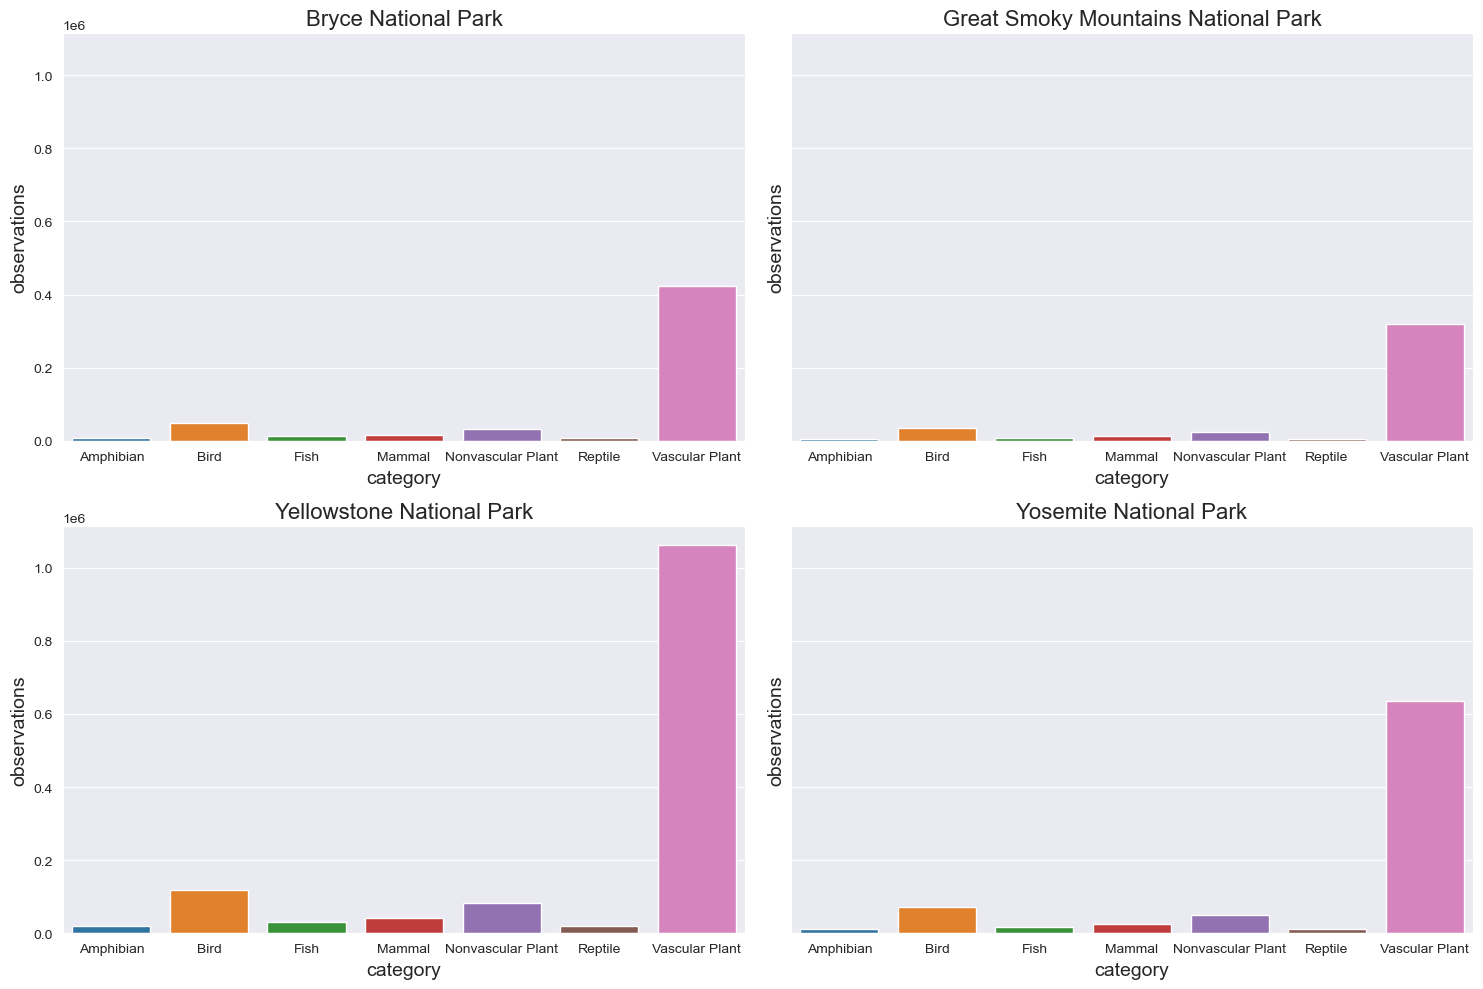

In [28]:
BNP = park_cat_obs[park_cat_obs['park_name'] == 'Bryce National Park']
GSMNP = park_cat_obs[park_cat_obs['park_name'] == 'Great Smoky Mountains National Park']
YeNP = park_cat_obs[park_cat_obs['park_name'] == 'Yellowstone National Park']
YoNP = park_cat_obs[park_cat_obs['park_name'] == 'Yosemite National Park']

sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

sns.barplot(data=BNP, x='category', y='observations', ax=axes[0, 0])
sns.barplot(data=GSMNP, x='category', y='observations', ax=axes[0, 1])
sns.barplot(data=YeNP, x='category', y='observations', ax=axes[1, 0])
sns.barplot(data=YoNP, x='category', y='observations', ax=axes[1, 1])

axes[0, 0].set_title('Bryce National Park')
axes[0, 1].set_title('Great Smoky Mountains National Park')
axes[1, 0].set_title('Yellowstone National Park')
axes[1, 1].set_title('Yosemite National Park')

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.set_title(ax.get_title(), fontsize=16)

plt.tight_layout()
plt.show()

From the above bar plots, we can see the distribution of categories within each park. The **Vascular Plant** category seems to be the most dominantly observed category in all parks. The **Amphibian**, **Fish** and **Reptile** categories look to be the smallest 3 observed categories in each of these parks.

An interesting thing to note in these plots is that the ratio of the distribution of categories seems to look the same among these 4 parks. This would be an indication that there is a difference in population sizes within each park due to the size of the parks themselves.

Now, let's take a look at the distribution of the conservation statuses within each park:

In [31]:
# To get the observations of each conservation_status for each park:
park_conservation = df.groupby(['park_name', 'conservation_status']).observations.sum().apply(lambda x: round(x, 1)).reset_index()
# We want to temporarily drop the 'None' status from conservation_status for the bar plot:
park_conservation_drop = park_conservation.drop(labels=[2, 7, 12, 17])
park_conservation_pivot = park_conservation.pivot(index='park_name', columns='conservation_status', values='observations')
park_conservation_pivot

conservation_status,Endangered,In Recovery,None,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,402.3,258.0,533154.7,13981.3,427.0
Great Smoky Mountains National Park,294.7,189.0,400412.7,9661.5,340.0
Yellowstone National Park,1008.0,559.0,1337375.2,33571.3,1087.0
Yosemite National Park,616.3,386.0,799676.0,20189.0,672.0


From the above table, we see that the species placed in the 'None' label make up the majority of the observations. The labels 'Endangered', 'In Recovery' and 'Threatened' are comprised of much lower numbers of species than 'Species of Concern'. We are more interested in the labels 'Endangered', 'In Recovery' and 'Threatened'. We will take a closer look at these 3 labels later on.

We can take a better look at the relative sizes of these labels in a bar plot below. However, due to the large number of observations in 'None' compared to the other labels, it will be temporarily removed from the bar plots to get a better look at the comparisons of the other labels:

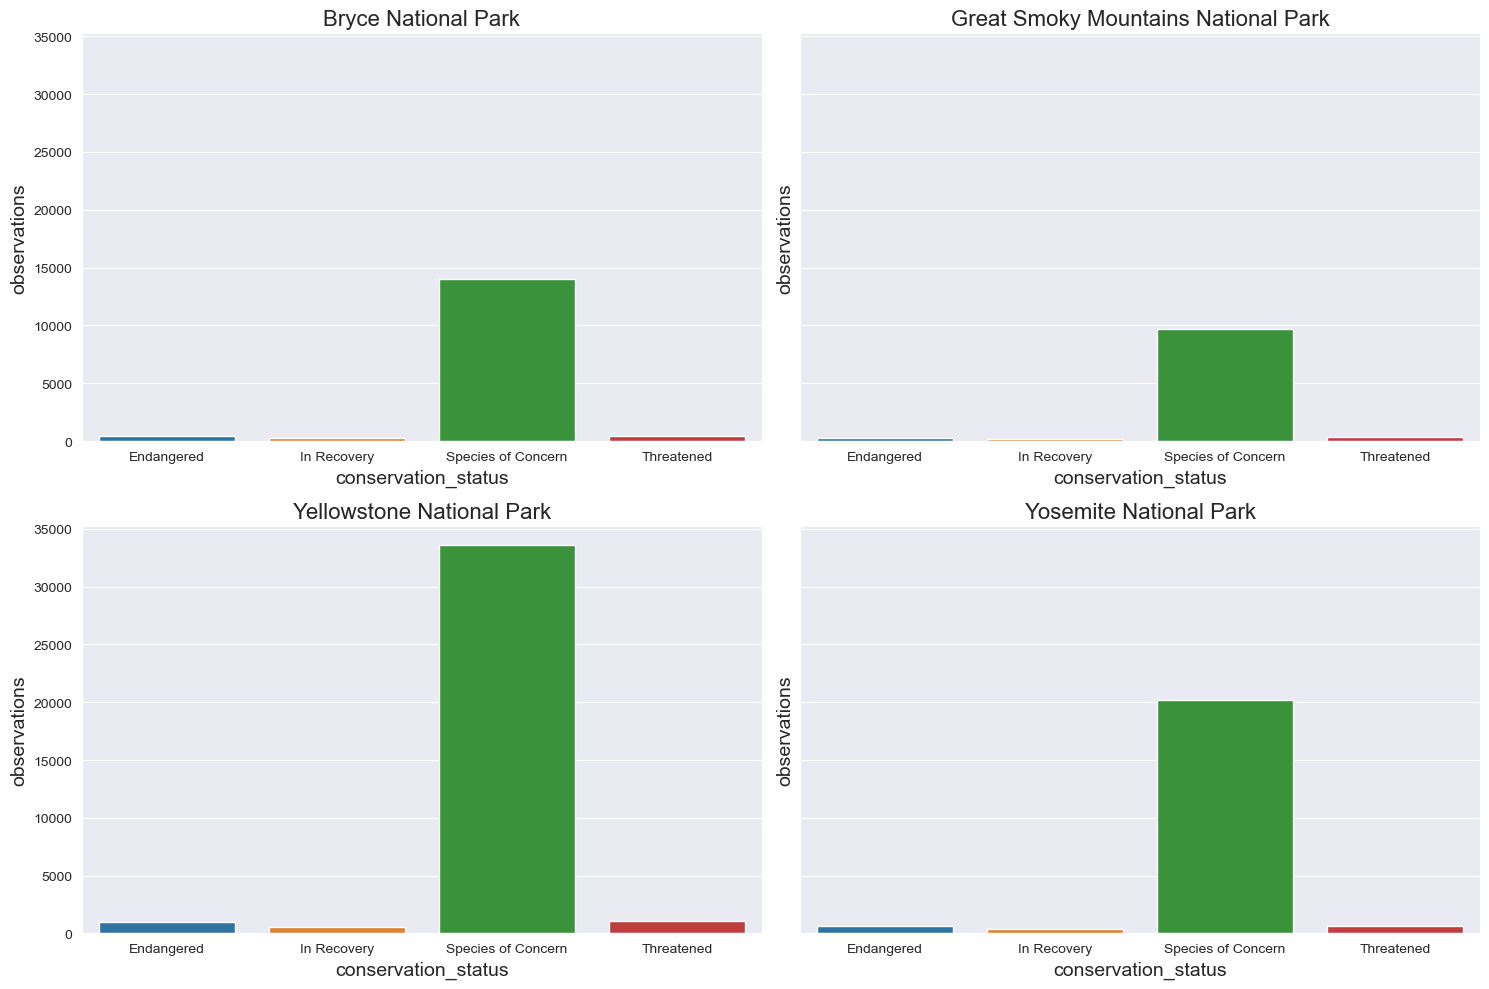

In [23]:
BNP_status = park_conservation_drop[park_conservation_drop['park_name'] == 'Bryce National Park']
GSMNP_status = park_conservation_drop[park_conservation_drop['park_name'] == 'Great Smoky Mountains National Park']
YeNP_status = park_conservation_drop[park_conservation_drop['park_name'] == 'Yellowstone National Park']
YoNP_status = park_conservation_drop[park_conservation_drop['park_name'] == 'Yosemite National Park']

sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

sns.barplot(data=BNP_status, x='conservation_status', y='observations', ax=axes[0, 0])
sns.barplot(data=GSMNP_status, x='conservation_status', y='observations', ax=axes[0, 1])
sns.barplot(data=YeNP_status, x='conservation_status', y='observations', ax=axes[1, 0])
sns.barplot(data=YoNP_status, x='conservation_status', y='observations', ax=axes[1, 1])

axes[0, 0].set_title('Bryce National Park')
axes[0, 1].set_title('Great Smoky Mountains National Park')
axes[1, 0].set_title('Yellowstone National Park')
axes[1, 1].set_title('Yosemite National Park')

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.set_title(ax.get_title(), fontsize=16)

plt.tight_layout()
plt.show()

From the above bar plots we can immediately see the size difference between the 'Species of Concern' label compared to the other labels. The labels 'Endangered', 'In Recovery' and 'Threatened' are much closer in observations.

We will take a closer look at the 'Endangered', 'In Recovery', 'Species of Concern' and 'Threatened' labels and see what category of species they fall under.

In [32]:
# Creating a dataset using the observations of conservation statuses but excluding the 'None' label:
cat_count = df[df['conservation_status'] != 'None'].groupby(['park_name', 'conservation_status', 'category']).observations.nunique().reset_index()

# Gathering the datasets seperately for each park:
BNP_cat = cat_count[cat_count['park_name'] == 'Bryce National Park']
GSMNP_cat = cat_count[cat_count['park_name'] == 'Great Smoky Mountains National Park']
YeNP_cat = cat_count[cat_count['park_name'] == 'Yellowstone National Park']
YoNP_cat = cat_count[cat_count['park_name'] == 'Yosemite National Park']

# Using a function to pivot the above datasets for each park:
def category_count(data):
    NP_cat_pivot = data.pivot(index='conservation_status', columns='category', values='observations')
    NP_cat_pivot.fillna(0, inplace=True)
    return NP_cat_pivot

print(f"{BNP_cat['park_name'].values[0]}:")
display(category_count(BNP_cat))
print(f"{GSMNP_cat['park_name'].values[0]}:")
display(category_count(GSMNP_cat))
print(f"{YeNP_cat['park_name'].values[0]}:")
display(category_count(YeNP_cat))
print(f"{YoNP_cat['park_name'].values[0]}:")
display(category_count(YoNP_cat))

Bryce National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,3.0,3.0,5.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Species of Concern,3.0,38.0,4.0,20.0,5.0,5.0,34.0
Threatened,2.0,0.0,3.0,2.0,0.0,0.0,2.0


Great Smoky Mountains National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,3.0,2.0,6.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Species of Concern,4.0,43.0,4.0,21.0,5.0,5.0,31.0
Threatened,2.0,0.0,3.0,2.0,0.0,0.0,2.0


Yellowstone National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,3.0,3.0,4.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Species of Concern,4.0,47.0,4.0,18.0,5.0,5.0,34.0
Threatened,2.0,0.0,3.0,2.0,0.0,0.0,1.0


Yosemite National Park:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,4.0,0.0,0.0,1.0
In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Species of Concern,4.0,41.0,3.0,17.0,5.0,5.0,30.0
Threatened,2.0,0.0,3.0,1.0,0.0,0.0,2.0


From the above tables, the 4 different parks all have very similar patterns, so any trends identified here should appear in all 4 parks:
* 'Endangered' - there seems to be a trend in that all but the **Nonvascular Plant** and **Reptile** categories are considered 'Endangered'.
* 'In Recovery' - the **Bird** category is the only category of species in all 4 parks under this label.
* 'Species of Concern' - we have all categories falling under this label with the **Bird** category being the most common.
* 'Threatened' - we see the same categories that appeared in the 'Endangered' label but excluding the **Bird** category.

We will now go into more detail of the 'Endangered', 'In Recovery' and 'Threatened' labels and view the corresponding species found in these labels:

In [36]:
# Grouping the corresponding 'Endangered', 'In Recovery' and 'Threatened' species:
endangered = df[df['conservation_status'] == 'Endangered'].groupby(['category', 'scientific_name', 'common_names'])\
                                                          .observations\
                                                          .min()\
                                                          .apply(lambda x: round(x, 1))\
                                                          .sort_values()\
                                                          .reset_index()

in_recovery = df[df['conservation_status'] == 'In Recovery'].groupby(['category', 'scientific_name', 'common_names'])\
                                                          .observations\
                                                          .min()\
                                                          .sort_values()\
                                                          .reset_index()


threatened = df[df['conservation_status'] == 'Threatened'].groupby(['category', 'scientific_name', 'common_names'])\
                                                          .observations\
                                                          .min()\
                                                          .sort_values()\
                                                          .reset_index()

print("Endangered Species:")
display(endangered)
print("In Recovery Species:")
display(in_recovery)
print("Threatened Species:")
display(threatened)

Endangered Species:


,category,scientific_name,common_names,observations
0,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,11.0
1,Bird,Grus americana,Whooping Crane,13.0
2,Mammal,Canis rufus,Red Wolf,13.0
3,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",14.0
4,Bird,Gymnogyps californianus,California Condor,15.0
5,Bird,Picoides borealis,Red-Cockaded Woodpecker,15.0
6,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",18.0
7,Mammal,Canis lupus,Gray Wolf,19.7
8,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",21.0
9,Fish,Noturus baileyi,Smoky Madtom,22.0


In Recovery Species:


,category,scientific_name,common_names,observations
0,Bird,Pelecanus occidentalis,Brown Pelican,47.0
1,Bird,Falco peregrinus anatum,American Peregrine Falcon,70.0
2,Bird,Haliaeetus leucocephalus,Bald Eagle,72.0


Threatened Species:


,category,scientific_name,common_names,observations
0,Fish,Erimonax monachus,Spotfin Chub,18.0
1,Amphibian,Anaxyrus canorus,Yosemite Toad,30.0
2,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",34.0
3,Fish,Noturus flavipinnis,Yellowfin Madtom,36.0
4,Vascular Plant,Isotria medeoloides,Small Whorled Pogonia,36.0
5,Amphibian,Rana draytonii,California Red-Legged Frog,37.0
6,Mammal,Ursus arctos horribilis,Grizzly Bear,38.0
7,Vascular Plant,Spiraea virginiana,Virginia Spiraea,45.0
8,Fish,Oncorhynchus clarkii henshawi,Lahontan Cutthroat Trout,48.0


From the above we see the different species that fall under each of the 3 conservation status labels that we are interested in. The common name used for the specific species are included under the **common_names** column. There seems to be more **Mammals** and **Birds** present in the 'Endangered' list. The 'In Recovery' list only contains **Birds** whilst the 'Threatened' list includes categories of **Fish**, **Amphibian**, **Mammal** and **Vascular Plant**.

Now although we do not have more information that can help motivate reason for a species being in one of these 3 conservation status labels, it must be stated that there are many other factors that are taken into consideration when assessing what conservation category a species should be placed under. The observation counts of a species can help provide insight into its current population count and over time you can use this to get a population trend of the specific species. Looking at the species in the 'In Recovery' list above, we can see that their observation counts are much higher than the observation counts for species that are 'Endangered' which would be logical given that an endangered species would have a smaller/decreasing population compared to species which are not endangered.

With the above information from the datasets, they are arranged so that the least observed species is at the top of the list for each conservation status label. This can be used as a list for each of the parks to ensure more priority starting with the species at the top.

## Conclusion:
This project gave the following insights:
* Population sizes among each park are relative to the size of the park.
* The Vascular Plant category was the most dominant category in all parks. 
* The Amphibian, Fish and Reptile were the 3 smallest categories in all parks.
* The conservation status label 'None' made up the majority of the observations. 
* The 'Endangered', 'In Recovery' and 'Threatened' labels contained much fewer total observations than the 'Species of Concern' label.
* The Mammal and Bird categories were the most frequent occuring in the endangered species. 
* The Nonvascular Plant and Reptile categories seemed to be the least in danger species.
* The Bird category was the only category observed under the 'In Recovery' label.
* In the 'Threatened' label, there were Fish, Amphibians, Mammals and Vascular Plants.

## Further Research:
* There are species under the 'None' conservation status with very low observation counts and if these species have not yet been finalized under a certain conservation status, then a seperate list of potential species that need to be reviewed can be made for the parks to pay closer attention to.
* If more observations can be gathered over time for each of these parks, then a more insightful analysis can be made with viewing changes in observations of certain species.